In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
print(f"X_train: {len(X_train)}")
print(f"X_test: {len(X_test)}")

X_train: 50000
X_test: 10000


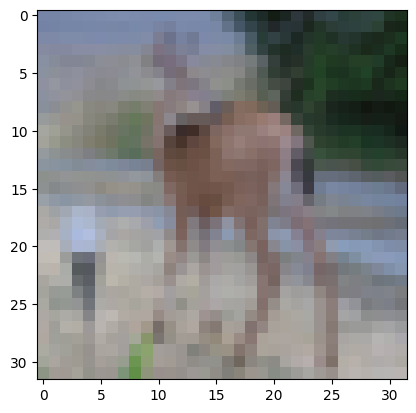

(32, 32, 3)


In [4]:
plt.imshow(X_test[100])
plt.show()

print(X_test[100].shape)

In [5]:
X_val = X_train[40000:]
y_val = y_train[40000:]


X_train = X_train[:40000]
y_train = y_train[:40000]

In [6]:
print(f"X_train: {len(X_train)}")
print(f"X_test: {len(X_test)}")
print(f"X_val: {len(X_val)}")

X_train: 40000
X_test: 10000
X_val: 10000


In [7]:
X_train = X_train/255
X_val = X_val/255
X_test = X_test/255

In [8]:
model = tf.keras.Sequential()

In [10]:
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu"))

model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [11]:
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu", input_shape=(32,32,3)))

model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu", input_shape=(32,32,3)))

In [12]:
model.add(tf.keras.layers.Flatten())

In [13]:
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

In [14]:
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [15]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [16]:
results = model.fit(X_train, y_train, batch_size=128, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
313/313 [==============================] - 16s 11ms/step - loss: 2.0506 - accuracy: 0.2129 - val_loss: 1.7382 - val_accuracy: 0.3576
Epoch 2/50
313/313 [==============================] - 2s 6ms/step - loss: 1.7123 - accuracy: 0.3424 - val_loss: 1.4823 - val_accuracy: 0.4572
Epoch 3/50
313/313 [==============================] - 2s 7ms/step - loss: 1.5190 - accuracy: 0.4322 - val_loss: 1.2924 - val_accuracy: 0.5379
Epoch 4/50
313/313 [==============================] - 2s 6ms/step - loss: 1.3838 - accuracy: 0.4958 - val_loss: 1.1644 - val_accuracy: 0.5851
Epoch 5/50
313/313 [==============================] - 2s 7ms/step - loss: 1.2843 - accuracy: 0.5426 - val_loss: 1.1543 - val_accuracy: 0.5942
Epoch 6/50
313/313 [==============================] - 2s 7ms/step - loss: 1.1971 - accuracy: 0.5825 - val_loss: 1.0277 - val_accuracy: 0.6389
Epoch 7/50
313/313 [==============================] - 2s 7ms/step - loss: 1.1314 - accuracy: 0.6040 - val_loss: 1.0975 - val_accuracy: 0.6194
Epoc

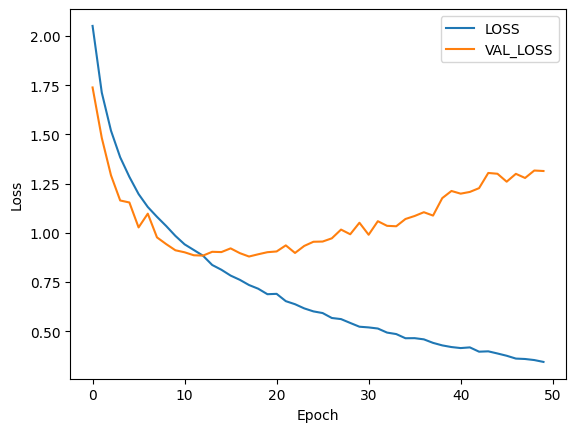

In [17]:
plt.plot(results.history["loss"], label="LOSS")
plt.plot(results.history["val_loss"], label="VAL_LOSS")

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend()

plt.show()

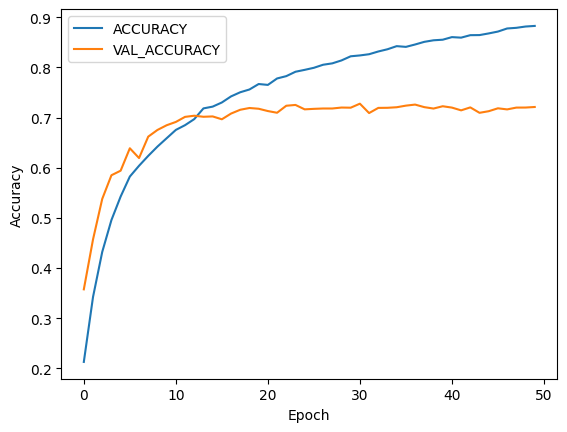

In [19]:
plt.plot(results.history["accuracy"], label="ACCURACY")
plt.plot(results.history["val_accuracy"], label="VAL_ACCURACY")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()

plt.show()

In [20]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.3732 - accuracy: 0.7168


[1.3731547594070435, 0.7167999744415283]

In [21]:
prediction_result = model.predict(X_test[100].reshape(1,32,32,3))
prediction_result

1/1 [==============================] - 0s 239ms/step


array([[1.7028570e-09, 1.3435921e-15, 5.7016552e-04, 1.6999737e-05,
        9.8173392e-01, 2.8923363e-03, 7.5277580e-09, 1.4786612e-02,
        4.8228320e-16, 3.8709539e-13]], dtype=float32)

In [24]:
predicted_class = prediction_result.argmax()

predicted_probability = prediction_result.max()

print(f"This image belogs to class {predicted_class} with {predicted_probability} probability %")

This image belogs to class 4 with 0.9817339181900024 probability %
